In [66]:
import gym
import safe_agents as sa

# Train and compare agents

In [2]:
EPISODES = 100
env = gym.make('LunarSafe-v0')

In [3]:
heuristic = sa.agents.HeuristicAgent(env)
scores1, safety1 = heuristic.train(episodes=EPISODES)

episode: 0  | score: 240.02849660362295 
episode: 1  | score: 254.78332750424966 
episode: 2  | score: 272.4555205308834 
episode: 3  | score: 6.676241739967253 
episode: 4  | score: 285.7673097468053 
episode: 5  | score: 263.7055016211448 
episode: 6  | score: 258.01468005062185 
episode: 7  | score: 134.0845432896485 
episode: 8  | score: 237.59415922269054 
episode: 9  | score: 242.06392994920913 
episode: 10  | score: 258.73193074875195 
episode: 11  | score: 295.9493626670255 
episode: 12  | score: 266.7920916946763 
episode: 13  | score: 306.57243750861124 
episode: 14  | score: 288.0221531514568 
episode: 15  | score: 243.24153660590994 
episode: 16  | score: 267.09561910892967 
episode: 17  | score: 288.4441032343965 
episode: 18  | score: 222.22198197231754 
episode: 19  | score: 49.45610049622354 
episode: 20  | score: 255.90628308255114 
episode: 21  | score: 297.2221011001772 
episode: 22  | score: -155.1230295090441 
episode: 23  | score: 259.43770347212103 
episode: 24  

In [4]:
dqn = sa.agents.DQNAgent(env)
scores2, safety2 = dqn.train(episodes=EPISODES)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

episode: 0  | score: -177.22517608775357  | memory: 84 | epsilon: 0.991634764908643
episode: 1  | score: -437.92677667082376  | memory: 169 | epsilon: 0.9832411730247218
episode: 2  | score: -145.88546742147037  | memory: 316 | epsilon: 0.9688925312494177
episode: 3  | score: 8.927236330709022  | memory: 403 | epsilon: 0.9604993100146869
episode: 4  | score: -63.22643901070751  | memory: 479 | epsilon: 0.9532268220888624
episode: 5  | score: -148.74577123552478  | memory: 599 | epsilon: 0.9418558936958947
episode: 6  | score: -81.41542129134905  | memory: 663 | epsilon: 0.9358469646093462
episode: 7  | score: -196.1943681131421  | memory: 752 | epsilon: 0.9275544683410445
episode: 8  | score: -202.77967253516562  | memory: 876 | epsilon: 0.9161232414485486
episode: 9  | score: -336.00499381343457  | memory: 1005 | epsilon: 0.9043805675860185
episode: 10  | score: -155.6057744183775  | memory: 1096 | epsil

In [5]:
a2c = sa.agents.A2CAgent(env)
scores3, safety3 = a2c.train(episodes=EPISODES)

episode: 0   score: -241.18504540857344
episode: 1   score: -364.62849108093144
episode: 2   score: -333.55541346150426
episode: 3   score: -336.1219232467726
episode: 4   score: -512.8733573030596
episode: 5   score: -243.8817299422452
episode: 6   score: -197.68690028844247
episode: 7   score: -405.7628849405776
episode: 8   score: -65.39742051649631
episode: 9   score: -142.71001592551613
episode: 10   score: -85.70426791513955
episode: 11   score: -280.46667673255513
episode: 12   score: -61.2353250660836
episode: 13   score: -169.99684977539005
episode: 14   score: -191.85144726619518
episode: 15   score: -74.24130399379618
episode: 16   score: -274.7502119513298
episode: 17   score: -84.78185517665824
episode: 18   score: -132.21144746875322
episode: 19   score: -108.60113573316644
episode: 20   score: -266.85270444541766
episode: 21   score: -296.1922248040273
episode: 22   score: -54.18655851009062
episode: 23   score: -197.61764015566163
episode: 24   score: -120.7937586847794

/usr/local/Caskroom/miniconda/base/envs/test-framework/lib/python3.6/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


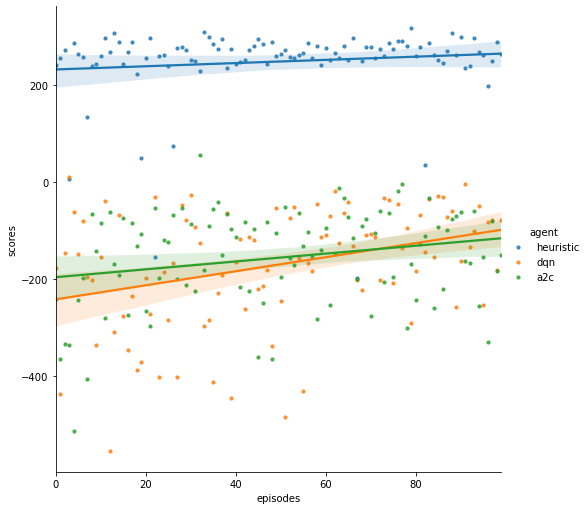

In [6]:
agents = ["heuristic", "dqn", "a2c"]
scores = scores1 + scores2 + scores3
sa.utils.plot_multi_scores(agents, scores)

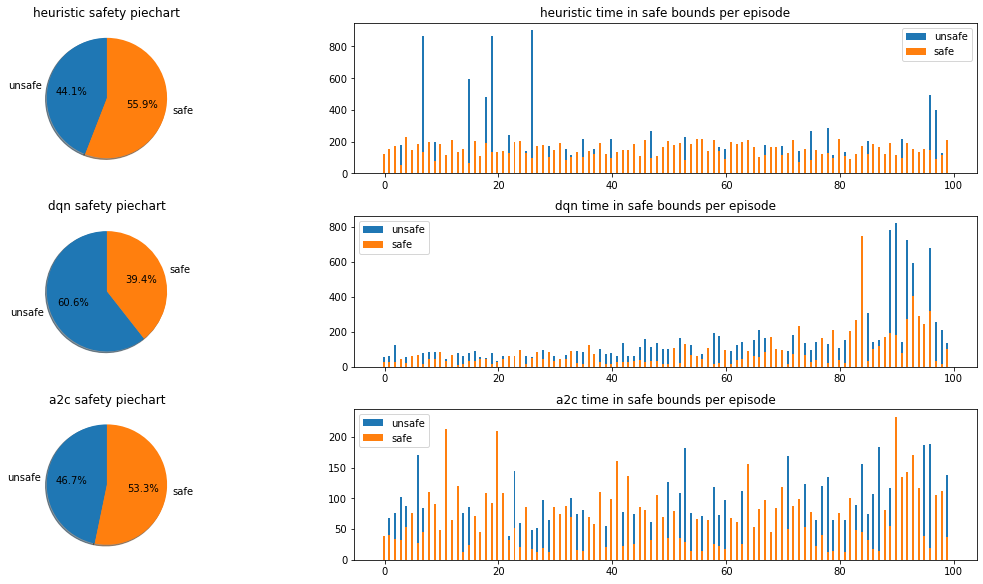

In [7]:
data = {'heuristic': safety1, 'dqn': safety2, 'a2c': safety3}
sa.utils.plot_multi_safety(data)

# Heuristic Safe Controller

a small algorithm that ensures an agent's safety after it has been trained using the domain knowledge.



In [83]:
"""
How does the controller know which states are safe and unsafe?

Option 1: Seperate learning process. The controller learns the state/action pairs of agent
as well as the safety outcome. It then learns to converge towards actions that are safe.

Option 2: Hard coded. Let the agents run. You already know when states are unsafe. Get the
minimum vertical coordinate. If the controller recieve an state with that coordinate, do
an intervention and get to a safe state again.
    
    Coordinates of lander during unsafe states
        0.1 for right bound
        -0.2 for left bound
"""
def controller(state):
    heuristic = sa.agents.HeuristicAgent(env)
    return heuristic.get_action(state)


import numpy as np

render = True
episodes = 5
agents = dqn, a2c

for a in agents:
    total_reward = 0
    safe_a, unsafe_a = 0, 0
    print(a.__class__.__name__)
    for e in range(episodes):
        done, override = False, False
        safe, unsafe = 0, 0
        state = env.reset()
        while not done:
            if render: env.render(mode='human')
            if override: 
                action = controller(state)
            else:
                action = a.get_action(state)
            state, r, done, info = env.step(action)
            total_reward += r
            if info['status']:
                safe += 1
                override = False
            else:
                unsafe += 1
                override = True
        safe_a = safe
        unsafe_a = unsafe
        print(f"\tepisode reward {total_reward}")
        print(f"\trisk ratio {unsafe/safe}\n")
    env.close()
    print("\t==============================")
    print(f"\ttotal reward {total_reward}")
    print(f"\tsafe states {safe_a} unsafe states {unsafe_a}\n")

DQNAgent
	episode reward -41.413728990396024
	risk ratio 0.16334661354581673

	episode reward 1.807904381354092
	risk ratio 1.25

	episode reward -42.43955898795726
	risk ratio 0.06837606837606838

	episode reward 96.49531945835355
	risk ratio 0.44320712694877507

	episode reward -75.77730742589738
	risk ratio 0.4807692307692308

	total reward -75.77730742589738
	safe states 156 unsafe states 75

A2CAgent
	episode reward 90.40818842377104
	risk ratio 0.11358574610244988

	episode reward 93.9471571923429
	risk ratio 0.8260869565217391

	episode reward 157.04905061029706
	risk ratio 4.026315789473684

	episode reward 209.65430717989534
	risk ratio 3.967741935483871

	episode reward 61.92272445245061
	risk ratio 0.0

	total reward 61.92272445245061
	safe states 107 unsafe states 0

